# Hands-on Activity 11.2 Classification using Logistic Regression

---

**Name**: Cuadra, Audrick Zander G.

**Section**: CPE22S3

**Date**: April 24, 2024

---

## Objective(s):
- This activity aims to demonstrate how to apply simple linear regression analysis to solve regression problem

## Intended Learning Outcomes (ILOs):
- Demonstrate how to solve classification problems using Logistic Regression
- Use the logistic regression model to perform classification

## Resources:
- Jupyter Notebook
- Dataset: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

## Submission Requirements:
- PDF containing initial EDA and Data Wrangling
- PDF showing demonstration of simple linear regression.
- Submit a link to the colab file through the comment section.

In [ ]:
# Install the ucimlrepo package
!pip install ucimlrepo

In [ ]:
# Import the dataset into your code
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

# metadata
print(cervical_cancer_risk_factors.metadata)

# variable information
print(cervical_cancer_risk_factors.variables)

{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

In [ ]:
# display of the X dataframe
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
# display of the y dataframe
y

In [ ]:
# importing of necessary libraries
import pandas as pd
import numpy as np

# concatinating the two dataframes
cercan_df = pd.concat([X, y], axis=1)

In [ ]:
cercan_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
# creating a function that checks for duplicates
def cdup(data):
    if data.duplicated().any():
        return data.duplicated().sum()
    else:
        return "No Duplicates Found!"

In [ ]:
# checking for duplicates
cdup(cercan_df)

23

In [ ]:
# dropping all the duplicates in the dataframe
cercan_df = cercan_df.drop_duplicates()

In [ ]:
# confirming if all the duplicates have been dropped
cdup(cercan_df)

'No Duplicates Found!'

In [ ]:
# checking the nulls
cercan_df.isnull().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

In [ ]:
# creating a function that detects if the column contains an outlier
def col_outliers(data):
    col_outliers=[]
    for i in data.columns:
        if data[i].isnull().any():
            low_bound = data[i].quantile(0.25) - (1.5 * (data[i].quantile(0.75) - data[i].quantile(0.25)))
            upper_bound = data[i].quantile(0.75) + (1.5 * (data[i].quantile(0.75) - data[i].quantile(0.25)))
            if ((data[i] < low_bound) |  (data[i] > upper_bound)).any():
                col_outliers.append(i)
    return col_outliers

In [ ]:
col_outliers(cercan_df)

['Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis']

In [ ]:
# creating a function that would fill in all the nulls
def fnullsmedian(data):
    for i in data.columns:
        if data[i].isnull().any():
            low_bound = data[i].quantile(0.25) - (1.5 * (data[i].quantile(0.75) - data[i].quantile(0.25)))
            upper_bound = data[i].quantile(0.75) + (1.5 * (data[i].quantile(0.75) - data[i].quantile(0.25)))
            if ((data[i] < low_bound) |  (data[i] > upper_bound)).any():
                data[i].fillna(data[i].median(), inplace=True)

In [ ]:
# filling the nulls
fnullsmedian(cercan_df)

In [ ]:
# checking if all the nulls have been dropped
cercan_df.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               103
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                             100
STDs:HIV                                0
STDs:Hepatitis B                  

In [ ]:
# creating a function that fills the rest of columns with nulls with mean
def fnullsmean(data):
    for i in data.columns:
        if data[i].isnull().any():
                data[i].fillna(data[i].mean(), inplace=True)

In [ ]:
fnullsmean(cercan_df)

In [ ]:
# checking if all nulls have been dropped
cercan_df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
def undscore(data):
    for i in data.columns:
        data.columns = [i.replace(' ', '_') for i in data.columns]
        data.columns = [i.strip('_') for i in data.columns]
    return data.columns

In [ ]:
undscore(cercan_df)

Index(['Age', 'Number_of_sexual_partners', 'First_sexual_intercourse',
       'Num_of_pregnancies', 'Smokes', 'Smokes_(years)', 'Smokes_(packs/year)',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_(years)', 'IUD',
       'IUD_(years)', 'STDs', 'STDs_(number)', 'STDs:condylomatosis',
       'STDs:cervical_condylomatosis', 'STDs:vaginal_condylomatosis',
       'STDs:vulvo-perineal_condylomatosis', 'STDs:syphilis',
       'STDs:pelvic_inflammatory_disease', 'STDs:genital_herpes',
       'STDs:molluscum_contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis_B', 'STDs:HPV', 'STDs:_Number_of_diagnosis',
       'STDs:_Time_since_first_diagnosis', 'STDs:_Time_since_last_diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
# checking the dataframe
cercan_df.head()

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes_(years),Smokes_(packs/year),Hormonal_Contraceptives,Hormonal_Contraceptives_(years),IUD,...,STDs:_Time_since_first_diagnosis,STDs:_Time_since_last_diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,4.0,3.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0


<Axes: >

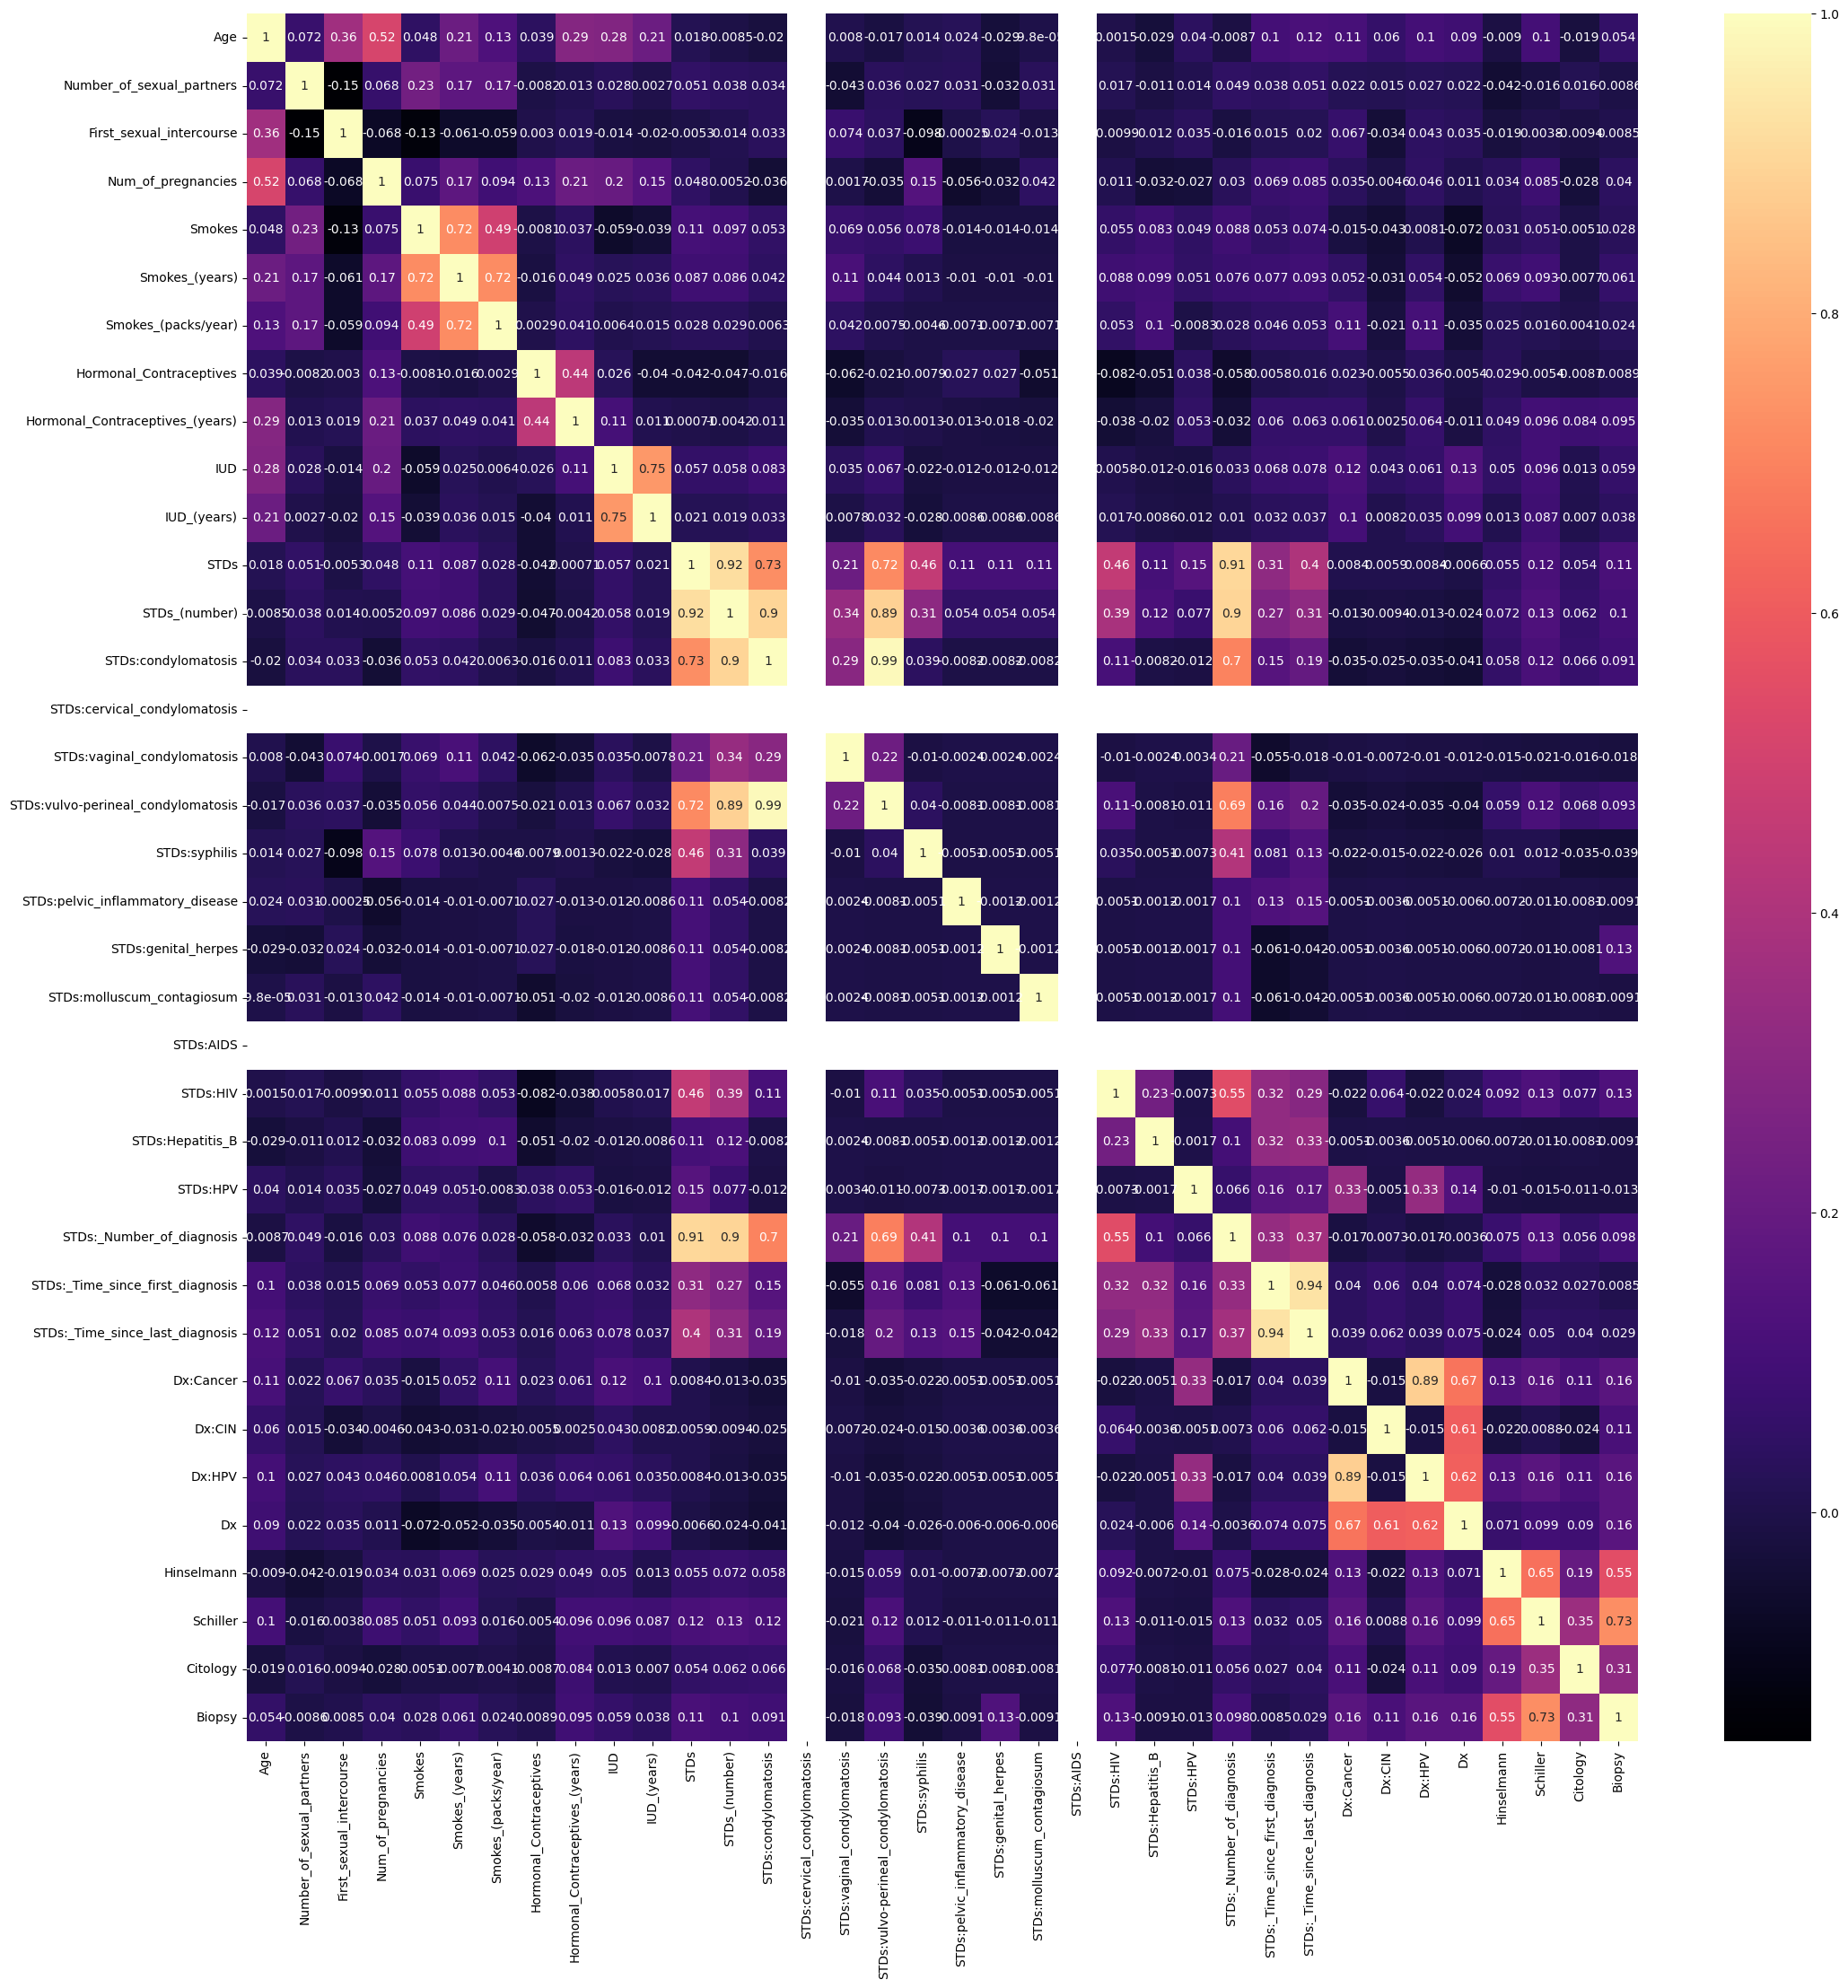

In [ ]:
# creating a heatmap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(25,25))

sns.heatmap(cercan_df.corr(), annot=True, cmap='magma')

## Logistic Regresson

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Types of Variable

In [ ]:
cercan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number_of_sexual_partners           835 non-null    float64
 2   First_sexual_intercourse            835 non-null    float64
 3   Num_of_pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes_(years)                      835 non-null    float64
 6   Smokes_(packs/year)                 835 non-null    float64
 7   Hormonal_Contraceptives             835 non-null    float64
 8   Hormonal_Contraceptives_(years)     835 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD_(years)                         835 non-null    float64
 11  STDs                                835 non-null  

In [ ]:
# find the categorical variables
cat = [i for i in cercan_df.columns if cercan_df[i].dtype=='O']
print(f'There are {len(cat)} categorical variables\n')
print('The categorical variables are: ', cat)

There are 0 categorical variables

The categorical variables are:  []


## Explore Numerical Variables

In [ ]:
# find the numerical variables
num = [i for i in cercan_df.columns if cercan_df[i].dtype != 'O']
print(f'There are {len(num)} numerical variables\n')
print('The numerical variables are:', num)

There are 36 numerical variables

The numerical variables are: ['Age', 'Number_of_sexual_partners', 'First_sexual_intercourse', 'Num_of_pregnancies', 'Smokes', 'Smokes_(years)', 'Smokes_(packs/year)', 'Hormonal_Contraceptives', 'Hormonal_Contraceptives_(years)', 'IUD', 'IUD_(years)', 'STDs', 'STDs_(number)', 'STDs:condylomatosis', 'STDs:cervical_condylomatosis', 'STDs:vaginal_condylomatosis', 'STDs:vulvo-perineal_condylomatosis', 'STDs:syphilis', 'STDs:pelvic_inflammatory_disease', 'STDs:genital_herpes', 'STDs:molluscum_contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis_B', 'STDs:HPV', 'STDs:_Number_of_diagnosis', 'STDs:_Time_since_first_diagnosis', 'STDs:_Time_since_last_diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']


In [ ]:
# checking if the length of the numerical is the same length as the dataframe
col = [i for i in cercan_df.columns]
len(col)

36

## Outliers in numerical values

In [ ]:
# creating a function to check all of the columns that has outliers
def outliers(data):
    outliers=[]
    for i in data.columns:
        low_bound = data[i].quantile(0.25) - (1.5 * (data[i].quantile(0.75) - data[i].quantile(0.25)))
        upper_bound = data[i].quantile(0.75) + (1.5 * (data[i].quantile(0.75) - data[i].quantile(0.25)))
        if ((data[i] < low_bound) |  (data[i] > upper_bound)).any():
            outliers.append(i)
    return outliers

In [ ]:
# checking all the columns in the dataframe
outliers(cercan_df)

['Age',
 'Number_of_sexual_partners',
 'First_sexual_intercourse',
 'Num_of_pregnancies',
 'Smokes',
 'Smokes_(years)',
 'Smokes_(packs/year)',
 'Hormonal_Contraceptives_(years)',
 'IUD',
 'IUD_(years)',
 'STDs',
 'STDs_(number)',
 'STDs:condylomatosis',
 'STDs:vaginal_condylomatosis',
 'STDs:vulvo-perineal_condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic_inflammatory_disease',
 'STDs:genital_herpes',
 'STDs:molluscum_contagiosum',
 'STDs:HIV',
 'STDs:Hepatitis_B',
 'STDs:HPV',
 'STDs:_Number_of_diagnosis',
 'STDs:_Time_since_first_diagnosis',
 'STDs:_Time_since_last_diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

In [ ]:
# checking to see which ones are booleans as to not include in the boxplot
cercan_df.describe(), 2

(              Age  Number_of_sexual_partners  First_sexual_intercourse  \
 count  835.000000                 835.000000                835.000000   
 mean    27.023952                   2.535329                 17.020359   
 std      8.482986                   1.654044                  2.805154   
 min     13.000000                   1.000000                 10.000000   
 25%     21.000000                   2.000000                 15.000000   
 50%     26.000000                   2.000000                 17.000000   
 75%     32.000000                   3.000000                 18.000000   
 max     84.000000                  28.000000                 32.000000   
 
        Num_of_pregnancies      Smokes  Smokes_(years)  Smokes_(packs/year)  \
 count          835.000000  835.000000      835.000000           835.000000   
 mean             2.283832    0.147305        1.234329             0.458571   
 std              1.408152    0.354623        4.111264             2.239363   
 min   

In [ ]:
cercan_df['Smokes_(years)'].value_counts()

Smokes_(years)
0.000000     712
1.266973      15
5.000000       9
9.000000       9
1.000000       8
3.000000       7
2.000000       7
16.000000      6
7.000000       6
8.000000       6
11.000000      5
4.000000       5
10.000000      5
14.000000      4
15.000000      4
6.000000       4
13.000000      3
0.500000       3
19.000000      3
12.000000      3
22.000000      2
32.000000      1
20.000000      1
28.000000      1
24.000000      1
18.000000      1
34.000000      1
21.000000      1
37.000000      1
0.160000       1
Name: count, dtype: int64

Text(0, 0.5, 'STDs:_Time_since_last_diagnosis')

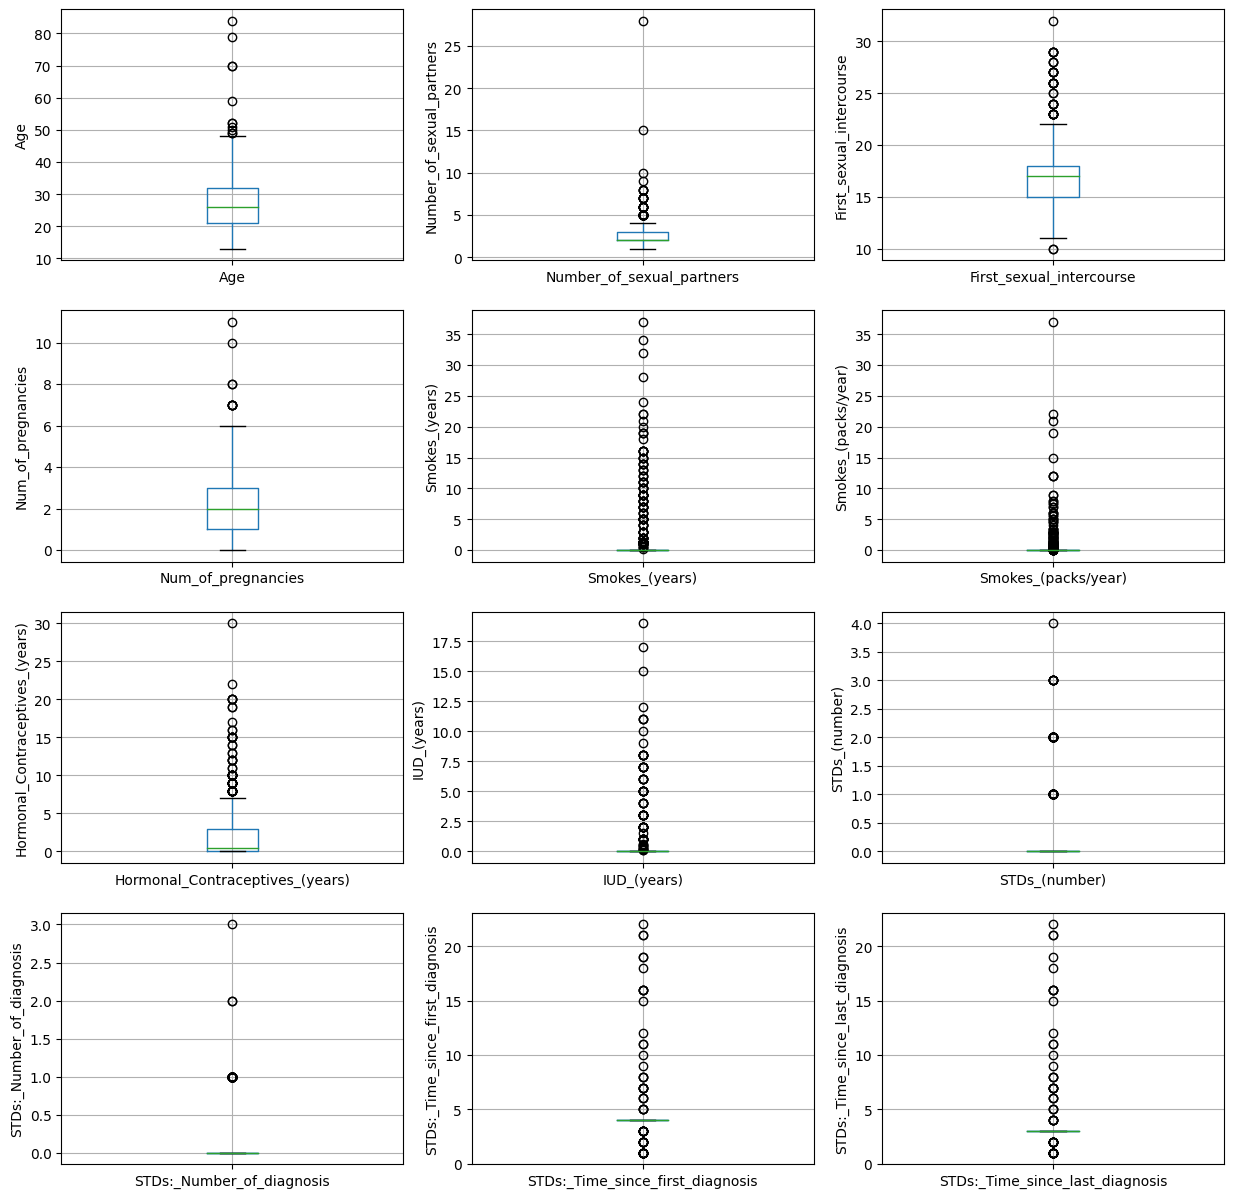

In [ ]:
# creating a boxplot for each column that is not boolean and has an outlier
plt.figure(figsize=(15,15))

plt.subplot(4, 3, 1)
fig = cercan_df.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(4, 3, 2)
fig = cercan_df.boxplot(column='Number_of_sexual_partners')
fig.set_title('')
fig.set_ylabel('Number_of_sexual_partners')

plt.subplot(4, 3, 3)
fig = cercan_df.boxplot(column='First_sexual_intercourse')
fig.set_title('')
fig.set_ylabel('First_sexual_intercourse')

plt.subplot(4, 3, 4)
fig = cercan_df.boxplot(column='Num_of_pregnancies')
fig.set_title('')
fig.set_ylabel('Num_of_pregnancies')

plt.subplot(4, 3, 5)
fig = cercan_df.boxplot(column='Smokes_(years)')
fig.set_title('')
fig.set_ylabel('Smokes_(years)')

plt.subplot(4, 3, 6)
fig = cercan_df.boxplot(column='Smokes_(packs/year)')
fig.set_title('')
fig.set_ylabel('Smokes_(packs/year)')

plt.subplot(4, 3, 7)
fig = cercan_df.boxplot(column='Hormonal_Contraceptives_(years)')
fig.set_title('')
fig.set_ylabel('Hormonal_Contraceptives_(years)')

plt.subplot(4, 3, 8)
fig = cercan_df.boxplot(column='IUD_(years)')
fig.set_title('')
fig.set_ylabel('IUD_(years)')

plt.subplot(4, 3, 9)
fig = cercan_df.boxplot(column='STDs_(number)')
fig.set_title('')
fig.set_ylabel('STDs_(number)')

plt.subplot(4, 3, 10)
fig = cercan_df.boxplot(column='STDs:_Number_of_diagnosis')
fig.set_title('')
fig.set_ylabel('STDs:_Number_of_diagnosis')

plt.subplot(4, 3, 11)
fig = cercan_df.boxplot(column='STDs:_Time_since_first_diagnosis')
fig.set_title('')
fig.set_ylabel('STDs:_Time_since_first_diagnosis')

plt.subplot(4, 3, 12)
fig = cercan_df.boxplot(column='STDs:_Time_since_last_diagnosis')
fig.set_title('')
fig.set_ylabel('STDs:_Time_since_last_diagnosis')

## Check the distribution of variables

Text(0, 0.5, 'Risk Factor')

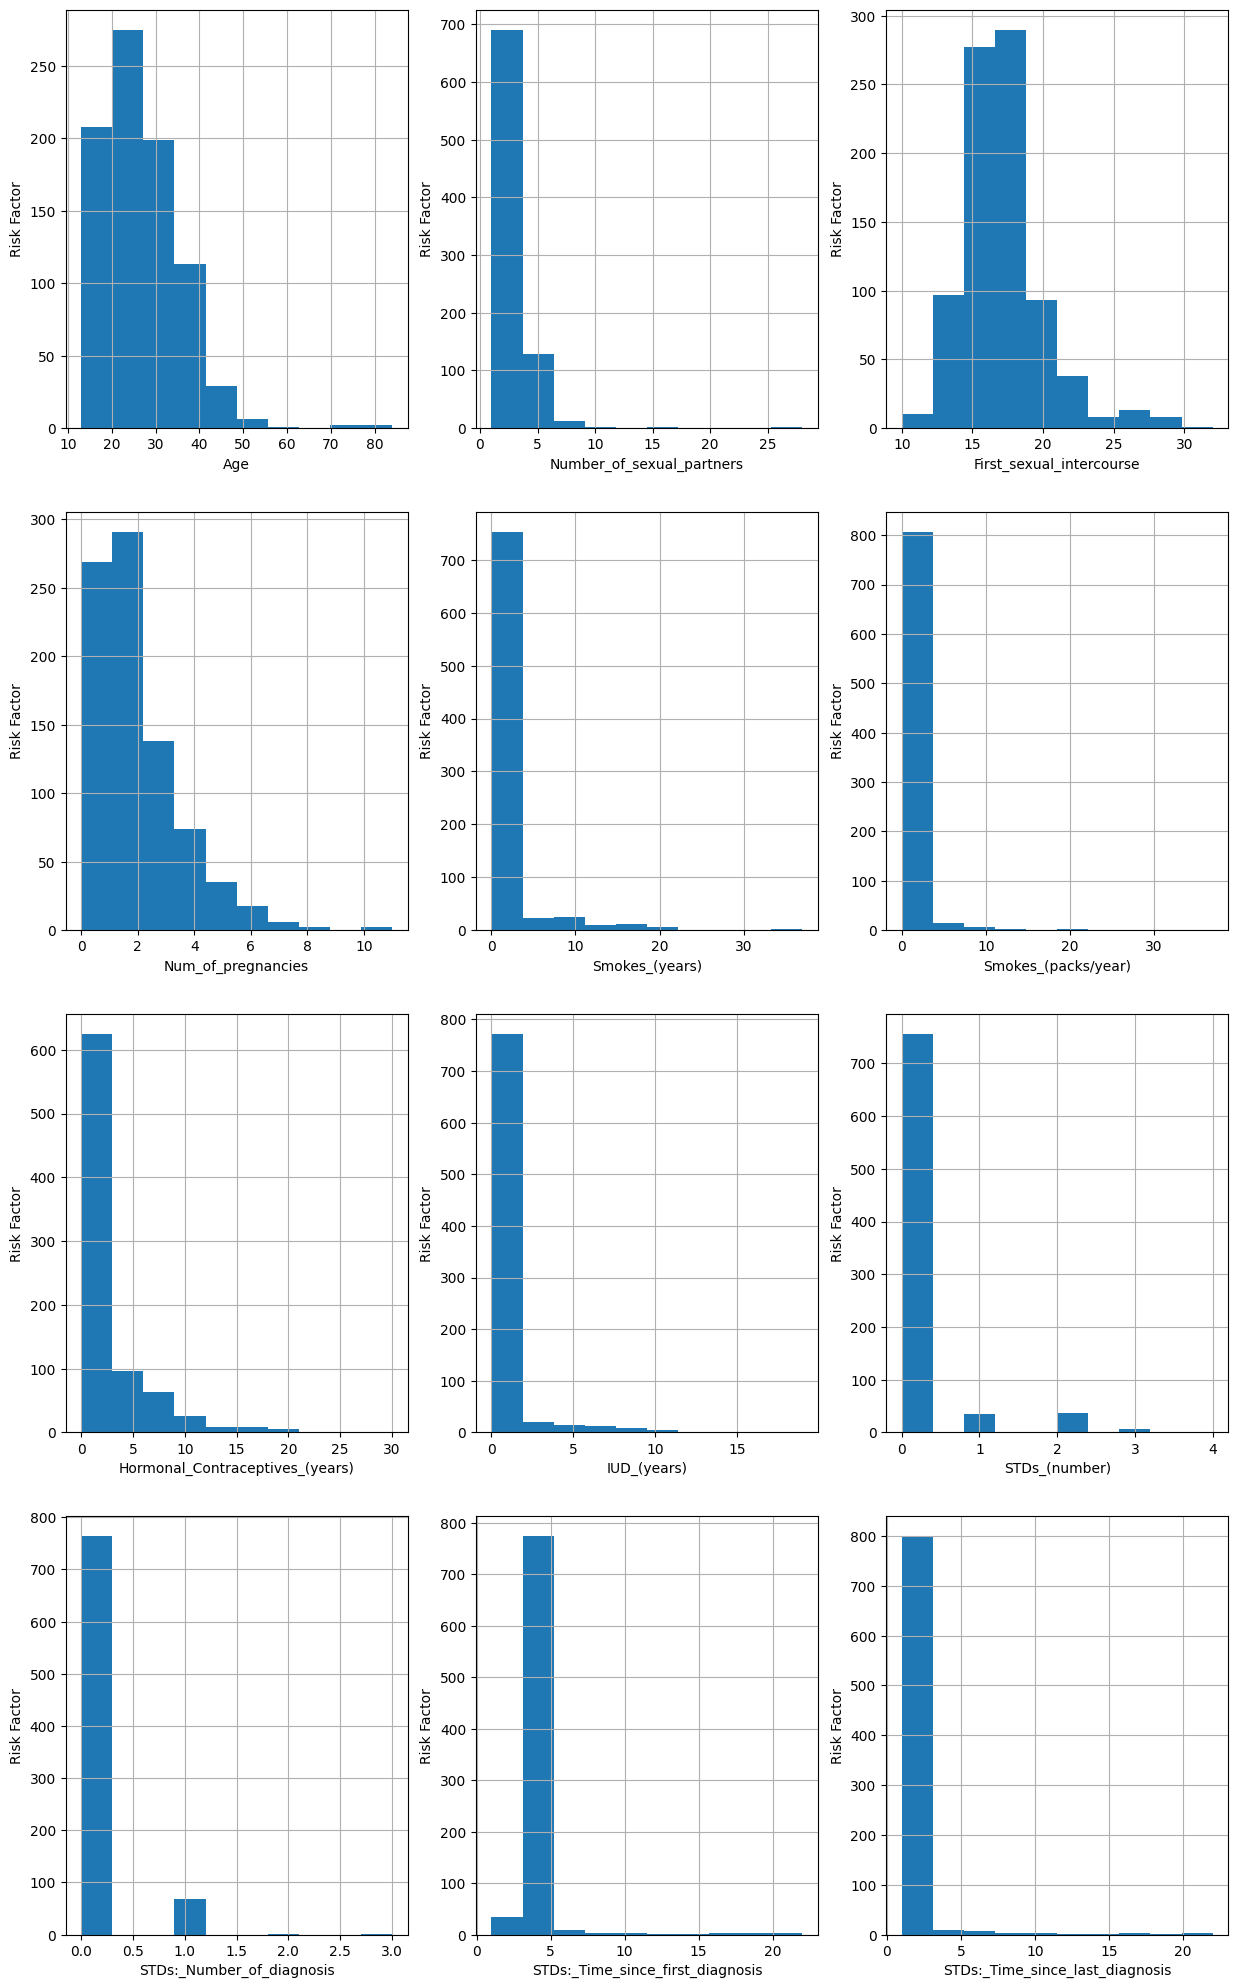

In [ ]:
# creating a boxplot for each column that is not boolean and has an outlier
# plotting the histogram to check the outliers
plt.figure(figsize=(15,25))

plt.subplot(4, 3, 1)
fig = cercan_df['Age'].hist(bins=10)
fig.set_xlabel('Age')
fig.set_ylabel('Risk Factor')

plt.subplot(4, 3, 2)
fig = cercan_df['Number_of_sexual_partners'].hist(bins=10)
fig.set_xlabel('Number_of_sexual_partners')
fig.set_ylabel('Risk Factor')

plt.subplot(4, 3, 3)
fig = cercan_df['First_sexual_intercourse'].hist(bins=10)
fig.set_xlabel('First_sexual_intercourse')
fig.set_ylabel('Risk Factor')

plt.subplot(4, 3, 4)
fig = cercan_df['Num_of_pregnancies'].hist(bins=10)
fig.set_xlabel('Num_of_pregnancies')
fig.set_ylabel('Risk Factor')


plt.subplot(4, 3, 5)
fig = cercan_df['Smokes_(years)'].hist(bins=10)
fig.set_xlabel('Smokes_(years)')
fig.set_ylabel('Risk Factor')

plt.subplot(4, 3, 6)
fig = cercan_df['Smokes_(packs/year)'].hist(bins=10)
fig.set_xlabel('Smokes_(packs/year)')
fig.set_ylabel('Risk Factor')

plt.subplot(4, 3, 7)
fig = cercan_df['Hormonal_Contraceptives_(years)'].hist(bins=10)
fig.set_xlabel('Hormonal_Contraceptives_(years)')
fig.set_ylabel('Risk Factor')

plt.subplot(4, 3, 8)
fig = cercan_df['IUD_(years)'].hist(bins=10)
fig.set_xlabel('IUD_(years)')
fig.set_ylabel('Risk Factor')

plt.subplot(4, 3, 9)
fig = cercan_df['STDs_(number)'].hist(bins=10)
fig.set_xlabel('STDs_(number)')
fig.set_ylabel('Risk Factor')

plt.subplot(4, 3, 10)
fig = cercan_df['STDs:_Number_of_diagnosis'].hist(bins=10)
fig.set_xlabel('STDs:_Number_of_diagnosis')
fig.set_ylabel('Risk Factor')

plt.subplot(4, 3, 11)
fig = cercan_df['STDs:_Time_since_first_diagnosis'].hist(bins=10)
fig.set_xlabel('STDs:_Time_since_first_diagnosis')
fig.set_ylabel('Risk Factor')

plt.subplot(4, 3, 12)
fig = cercan_df['STDs:_Time_since_last_diagnosis'].hist(bins=10)
fig.set_xlabel('STDs:_Time_since_last_diagnosis')
fig.set_ylabel('Risk Factor')

Since all outliers are scewed, interquartile range would be used to find the outliers.

In [ ]:
low_bound = cercan_df['Age'].quantile(0.25) - (1.5 * (cercan_df['Age'].quantile(0.75) - cercan_df['Age'].quantile(0.25)))
upper_bound = cercan_df['Age'].quantile(0.75) + (1.5 * (cercan_df['Age'].quantile(0.75) - cercan_df['Age'].quantile(0.25)))
print(f'Age outliers are value < {low_bound} or > {upper_bound}')

Age outliers are value < 4.5 or > 48.5


In [ ]:
low_bound = cercan_df['Number_of_sexual_partners'].quantile(0.25) - (1.5 * (cercan_df['Number_of_sexual_partners'].quantile(0.75) - cercan_df['Number_of_sexual_partners'].quantile(0.25)))
upper_bound = cercan_df['Number_of_sexual_partners'].quantile(0.75) + (1.5 * (cercan_df['Number_of_sexual_partners'].quantile(0.75) - cercan_df['Number_of_sexual_partners'].quantile(0.25)))
print(f'Number_of_sexual_partners outliers are value < {low_bound} or > {upper_bound}')

Number_of_sexual_partners outliers are value < 0.5 or > 4.5


In [ ]:
low_bound = cercan_df['First_sexual_intercourse'].quantile(0.25) - (1.5 * (cercan_df['First_sexual_intercourse'].quantile(0.75) - cercan_df['First_sexual_intercourse'].quantile(0.25)))
upper_bound = cercan_df['First_sexual_intercourse'].quantile(0.75) + (1.5 * (cercan_df['First_sexual_intercourse'].quantile(0.75) - cercan_df['First_sexual_intercourse'].quantile(0.25)))
print(f'First_sexual_intercourse outliers are value < {low_bound} or > {upper_bound}')

First_sexual_intercourse outliers are value < 10.5 or > 22.5


In [ ]:
low_bound = cercan_df['Num_of_pregnancies'].quantile(0.25) - (1.5 * (cercan_df['Num_of_pregnancies'].quantile(0.75) - cercan_df['Num_of_pregnancies'].quantile(0.25)))
upper_bound = cercan_df['Num_of_pregnancies'].quantile(0.75) + (1.5 * (cercan_df['Num_of_pregnancies'].quantile(0.75) - cercan_df['Num_of_pregnancies'].quantile(0.25)))
print(f'Num_of_pregnancies outliers are value < {low_bound} or > {upper_bound}')

Num_of_pregnancies outliers are value < -2.0 or > 6.0


In [ ]:
low_bound = cercan_df['Smokes_(years)'].quantile(0.25) - (1.5 * (cercan_df['Smokes_(years)'].quantile(0.75) - cercan_df['Smokes_(years)'].quantile(0.25)))
upper_bound = cercan_df['Smokes_(years)'].quantile(0.75) + (1.5 * (cercan_df['Smokes_(years)'].quantile(0.75) - cercan_df['Smokes_(years)'].quantile(0.25)))
print(f'Smokes_(years) outliers are value < {low_bound} or > {upper_bound}')

Smokes_(years) outliers are value < 0.0 or > 0.0


In [ ]:
cercan_df['Smokes_(years)'].value_counts()

Smokes_(years)
0.000000     712
1.266973      15
5.000000       9
9.000000       9
1.000000       8
3.000000       7
2.000000       7
16.000000      6
7.000000       6
8.000000       6
11.000000      5
4.000000       5
10.000000      5
14.000000      4
15.000000      4
6.000000       4
13.000000      3
0.500000       3
19.000000      3
12.000000      3
22.000000      2
32.000000      1
20.000000      1
28.000000      1
24.000000      1
18.000000      1
34.000000      1
21.000000      1
37.000000      1
0.160000       1
Name: count, dtype: int64

In [ ]:
low_bound = cercan_df['Smokes_(packs/year)'].quantile(0.25) - (1.5 * (cercan_df['Smokes_(packs/year)'].quantile(0.75) - cercan_df['Smokes_(packs/year)'].quantile(0.25)))
upper_bound = cercan_df['Smokes_(packs/year)'].quantile(0.75) + (1.5 * (cercan_df['Smokes_(packs/year)'].quantile(0.75) - cercan_df['Smokes_(packs/year)'].quantile(0.25)))
print(f'Smokes_(packs/year) outliers are value < {low_bound} or > {upper_bound}')

Smokes_(packs/year) outliers are value < 0.0 or > 0.0


In [ ]:
cercan_df['Smokes_(packs/year)'].value_counts()

Smokes_(packs/year)
0.000000     712
0.513202      18
1.000000       6
3.000000       5
2.000000       4
            ... 
7.500000       1
37.000000      1
2.250000       1
0.003000       1
0.300000       1
Name: count, Length: 62, dtype: int64

In [ ]:
low_bound = cercan_df['Hormonal_Contraceptives_(years)'].quantile(0.25) - (1.5 * (cercan_df['Hormonal_Contraceptives_(years)'].quantile(0.75) - cercan_df['Hormonal_Contraceptives_(years)'].quantile(0.25)))
upper_bound = cercan_df['Hormonal_Contraceptives_(years)'].quantile(0.75) + (1.5 * (cercan_df['Hormonal_Contraceptives_(years)'].quantile(0.75) - cercan_df['Hormonal_Contraceptives_(years)'].quantile(0.25)))
print(f'Hormonal_Contraceptives_(years) outliers are value < {low_bound} or > {upper_bound}')

Hormonal_Contraceptives_(years) outliers are value < -4.5 or > 7.5


In [ ]:
low_bound = cercan_df['IUD_(years)'].quantile(0.25) - (1.5 * (cercan_df['IUD_(years)'].quantile(0.75) - cercan_df['IUD_(years)'].quantile(0.25)))
upper_bound = cercan_df['IUD_(years)'].quantile(0.75) + (1.5 * (cercan_df['IUD_(years)'].quantile(0.75) - cercan_df['IUD_(years)'].quantile(0.25)))
print(f'IUD_(years) outliers are value < {low_bound} or > {upper_bound}')

IUD_(years) outliers are value < 0.0 or > 0.0


In [ ]:
cercan_df['IUD_(years)'].value_counts()

IUD_(years)
0.00     752
3.00      11
2.00      10
5.00       9
1.00       8
8.00       7
7.00       7
6.00       5
4.00       5
11.00      3
0.08       2
0.50       2
0.33       1
9.00       1
0.41       1
0.16       1
0.91       1
1.50       1
10.00      1
12.00      1
15.00      1
0.25       1
17.00      1
19.00      1
0.58       1
0.17       1
Name: count, dtype: int64

In [ ]:
low_bound = cercan_df['STDs_(number)'].quantile(0.25) - (1.5 * (cercan_df['STDs_(number)'].quantile(0.75) - cercan_df['STDs_(number)'].quantile(0.25)))
upper_bound = cercan_df['STDs_(number)'].quantile(0.75) + (1.5 * (cercan_df['STDs_(number)'].quantile(0.75) - cercan_df['STDs_(number)'].quantile(0.25)))
print(f'STDs_(number) outliers are value < {low_bound} or > {upper_bound}')

STDs_(number) outliers are value < 0.0 or > 0.0


In [ ]:
cercan_df['STDs_(number)'].value_counts()

STDs_(number)
0.0    756
2.0     37
1.0     34
3.0      7
4.0      1
Name: count, dtype: int64

In [ ]:
low_bound = cercan_df['STDs:_Number_of_diagnosis'].quantile(0.25) - (1.5 * (cercan_df['STDs:_Number_of_diagnosis'].quantile(0.75) - cercan_df['STDs:_Number_of_diagnosis'].quantile(0.25)))
upper_bound = cercan_df['STDs:_Number_of_diagnosis'].quantile(0.75) + (1.5 * (cercan_df['STDs:_Number_of_diagnosis'].quantile(0.75) - cercan_df['STDs:_Number_of_diagnosis'].quantile(0.25)))
print(f'STDs:_Number_of_diagnosis outliers are value < {low_bound} or > {upper_bound}')

STDs:_Number_of_diagnosis outliers are value < 0.0 or > 0.0


In [ ]:
cercan_df['STDs:_Number_of_diagnosis'].value_counts()

STDs:_Number_of_diagnosis
0    764
1     68
2      2
3      1
Name: count, dtype: int64

In [ ]:
low_bound = cercan_df['STDs:_Time_since_first_diagnosis'].quantile(0.25) - (1.5 * (cercan_df['STDs:_Time_since_first_diagnosis'].quantile(0.75) - cercan_df['STDs:_Time_since_first_diagnosis'].quantile(0.25)))
upper_bound = cercan_df['STDs:_Time_since_first_diagnosis'].quantile(0.75) + (1.5 * (cercan_df['STDs:_Time_since_first_diagnosis'].quantile(0.75) - cercan_df['STDs:_Time_since_first_diagnosis'].quantile(0.25)))
print(f'STDs:_Time_since_first_diagnosis outliers are value < {low_bound} or > {upper_bound}')

STDs:_Time_since_first_diagnosis outliers are value < 4.0 or > 4.0


In [ ]:
low_bound = cercan_df['STDs:_Time_since_last_diagnosis'].quantile(0.25) - (1.5 * (cercan_df['STDs:_Time_since_last_diagnosis'].quantile(0.75) - cercan_df['STDs:_Time_since_last_diagnosis'].quantile(0.25)))
upper_bound = cercan_df['STDs:_Time_since_last_diagnosis'].quantile(0.75) + (1.5 * (cercan_df['STDs:_Time_since_last_diagnosis'].quantile(0.75) - cercan_df['STDs:_Time_since_last_diagnosis'].quantile(0.25)))
print(f'STDs:_Time_since_last_diagnosis outliers are value < {low_bound} or > {upper_bound}')

STDs:_Time_since_last_diagnosis outliers are value < 3.0 or > 3.0


## Declare feature vector and target variable

In [ ]:
# since y does not have a dataframe then there is not target variable
X = cercan_df.drop(['Biopsy'], axis=1)
y = cercan_df['Biopsy']

## Split data into separate training and test set

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((668, 35), (167, 35))

## Engineering outliers in numerical values

In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Age'] = max_value(df3, 'Age', 48.5)
    df3['Number_of_sexual_partners'] = max_value(df3, 'Number_of_sexual_partners', 4.5)
    df3['First_sexual_intercourse'] = max_value(df3, 'First_sexual_intercourse', 22.5)
    df3['Num_of_pregnancies'] = max_value(df3, 'Num_of_pregnancies', 6.0)
    df3['Hormonal_Contraceptives_(years)'] = max_value(df3, 'Hormonal_Contraceptives_(years)', 7.5)
    df3['STDs:_Time_since_first_diagnosis'] = max_value(df3, 'STDs:_Time_since_first_diagnosis', 4.0)
    df3['STDs:_Time_since_last_diagnosis'] = max_value(df3, 'STDs:_Time_since_last_diagnosis', 3.0)

In [ ]:
X_train['Age'].max(), X_test['Age'].max()

(48.5, 48.5)

In [ ]:
X_train['Number_of_sexual_partners'].max(), X_test['Number_of_sexual_partners'].max()

(4.5, 4.5)

In [ ]:
X_train['First_sexual_intercourse'].max(), X_test['First_sexual_intercourse'].max()

(22.5, 22.5)

In [ ]:
X_train['Num_of_pregnancies'].max(), X_test['Num_of_pregnancies'].max()

(6.0, 6.0)

In [ ]:
X_train['Hormonal_Contraceptives_(years)'].max(), X_test['Hormonal_Contraceptives_(years)'].max()

(7.5, 7.5)

In [ ]:
X_train['STDs:_Time_since_first_diagnosis'].max(), X_test['STDs:_Time_since_first_diagnosis'].max()

(4.0, 4.0)

In [ ]:
X_train['STDs:_Time_since_last_diagnosis'].max(), X_test['STDs:_Time_since_last_diagnosis'].max()

(3.0, 3.0)

## Feature Scaling

In [ ]:
X_train.describe()

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes_(years),Smokes_(packs/year),Hormonal_Contraceptives,Hormonal_Contraceptives_(years),IUD,...,STDs:_Number_of_diagnosis,STDs:_Time_since_first_diagnosis,STDs:_Time_since_last_diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,26.738024,2.439371,16.855539,2.232036,0.157186,1.267709,0.470837,0.655363,1.791878,0.103293,...,0.085329,3.917665,2.947605,0.025449,0.007485,0.025449,0.028443,0.041916,0.085329,0.053892
std,7.613179,1.096057,2.289344,1.282470,0.364248,4.021316,2.257145,0.445683,2.512145,0.304570,...,0.305218,0.449006,0.302826,0.157603,0.086256,0.157603,0.166360,0.200548,0.279581,0.225974
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.500000,4.500000,22.500000,6.000000,1.000000,37.000000,37.000000,1.000000,7.500000,1.000000,...,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes_(years),Smokes_(packs/year),Hormonal_Contraceptives,Hormonal_Contraceptives_(years),IUD,...,STDs:_Number_of_diagnosis,STDs:_Time_since_first_diagnosis,STDs:_Time_since_last_diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.386987,0.411249,0.548443,0.372006,0.157186,0.034262,0.012725,0.655363,0.238917,0.103293,...,0.028443,0.972555,0.973802,0.025449,0.007485,0.025449,0.028443,0.041916,0.085329,0.053892
std,0.214456,0.313159,0.183147,0.213745,0.364248,0.108684,0.061004,0.445683,0.334953,0.304570,...,0.101739,0.149669,0.151413,0.157603,0.086256,0.157603,0.166360,0.200548,0.279581,0.225974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.225352,0.285714,0.400000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.366197,0.285714,0.560000,0.333333,0.000000,0.000000,0.000000,1.000000,0.066667,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.535211,0.571429,0.640000,0.500000,0.000000,0.000000,0.000000,1.000000,0.400000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Training

In [ ]:
# train a Logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Predict Results

In [ ]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## predict_proba method
**predict_proba** gives the probabilities for the target variable(0 and 1) in this case, in array form.



In [ ]:
logreg.predict_proba(X_test)[:,0]

array([0.9318181 , 0.98652533, 0.99130247, 0.98709881, 0.97337435,
       0.98413044, 0.76004681, 0.98998675, 0.98483541, 0.98113619,
       0.9624972 , 0.9866606 , 0.99314353, 0.98595472, 0.46235823,
       0.98124161, 0.99011633, 0.98309391, 0.98426304, 0.98100949,
       0.99061539, 0.98285467, 0.93654504, 0.98448176, 0.98529191,
       0.95787997, 0.98420974, 0.98416174, 0.99570361, 0.32386843,
       0.93985344, 0.98433208, 0.69838836, 0.98504967, 0.97806979,
       0.98342582, 0.98714347, 0.98531745, 0.99012043, 0.98423749,
       0.98185636, 0.98413755, 0.98210074, 0.98476949, 0.99141842,
       0.98434966, 0.66625298, 0.98348171, 0.98668871, 0.98701919,
       0.98311955, 0.98468404, 0.98303297, 0.98402773, 0.9943138 ,
       0.93420265, 0.98265801, 0.98430784, 0.98595543, 0.98210833,
       0.9878019 , 0.97685329, 0.98682516, 0.98181535, 0.98219048,
       0.99061445, 0.97967217, 0.96883172, 0.98484432, 0.98316253,
       0.4313646 , 0.98572152, 0.97981937, 0.98093667, 0.94619

In [ ]:
logreg.predict_proba(X_test)[:,1]

array([0.0681819 , 0.01347467, 0.00869753, 0.01290119, 0.02662565,
       0.01586956, 0.23995319, 0.01001325, 0.01516459, 0.01886381,
       0.0375028 , 0.0133394 , 0.00685647, 0.01404528, 0.53764177,
       0.01875839, 0.00988367, 0.01690609, 0.01573696, 0.01899051,
       0.00938461, 0.01714533, 0.06345496, 0.01551824, 0.01470809,
       0.04212003, 0.01579026, 0.01583826, 0.00429639, 0.67613157,
       0.06014656, 0.01566792, 0.30161164, 0.01495033, 0.02193021,
       0.01657418, 0.01285653, 0.01468255, 0.00987957, 0.01576251,
       0.01814364, 0.01586245, 0.01789926, 0.01523051, 0.00858158,
       0.01565034, 0.33374702, 0.01651829, 0.01331129, 0.01298081,
       0.01688045, 0.01531596, 0.01696703, 0.01597227, 0.0056862 ,
       0.06579735, 0.01734199, 0.01569216, 0.01404457, 0.01789167,
       0.0121981 , 0.02314671, 0.01317484, 0.01818465, 0.01780952,
       0.00938555, 0.02032783, 0.03116828, 0.01515568, 0.01683747,
       0.5686354 , 0.01427848, 0.02018063, 0.01906333, 0.05380

## Check accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9461


## Compare the train-set and test-set accuracy

In [ ]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9671


## Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print(f'Training set score: {train_score}')
print(f'Test set score: {test_score}')

Training set score: 0.9670658682634731
Test set score: 0.9461077844311377


## Confusion Matrix

In [ ]:
# import the necessary library
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

<Axes: >

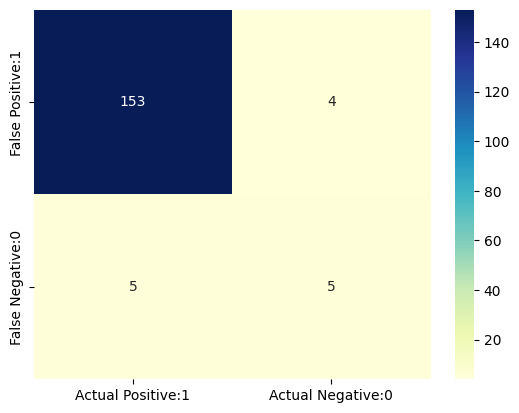

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['False Positive:1', 'False Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification metrices

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       157
           1       0.56      0.50      0.53        10

    accuracy                           0.95       167
   macro avg       0.76      0.74      0.75       167
weighted avg       0.94      0.95      0.94       167



## Classification accuracy


In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy:{0:0.4f}'.format(classification_accuracy))

Classification accuracy:0.9461


## Classification error

In [ ]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error:{0:0.4f}'.format(classification_error))

Classification error:0.0539


## Precision

In [ ]:
# print precision score
precision = TP / float(TP + FP)
print('Precision:{0:0.4f}'.format(precision))

Precision:0.9745


## Recall

In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity: {0:0.4f}'.format(recall))

Recall or Sensitivity: 0.9684


## True Positive Rate


In [ ]:
tpr = TP / float(TP + FN)
print('True Positive Rate: {0:0.4f}'.format(tpr))

True Positive Rate: 0.9684


## False Positive Rate

In [ ]:
fpr = FP / float(FP + FN)
print('False Positive Rate: {0:0.4f}'.format(fpr))

False Positive Rate: 0.4444


## Specificity

In [ ]:
specificity = TN / (TN + FP)
print('Specificity: {0:0.4f}'.format(specificity))

Specificity: 0.5556


## Adjusting the treshold level

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1
y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.9318181 , 0.0681819 ],
       [0.98652533, 0.01347467],
       [0.99130247, 0.00869753],
       [0.98709881, 0.01290119],
       [0.97337435, 0.02662565],
       [0.98413044, 0.01586956],
       [0.76004681, 0.23995319],
       [0.98998675, 0.01001325],
       [0.98483541, 0.01516459],
       [0.98113619, 0.01886381]])

In [ ]:
# store the probabilities in dataframe
y_pred_prob = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No biopsy (0)', 'Prob of - Biopsy (1)'])
y_pred_prob

,Prob of - No biopsy (0),Prob of - Biopsy (1)
0,0.931818,0.068182
1,0.986525,0.013475
2,0.991302,0.008698
3,0.987099,0.012901
4,0.973374,0.026626
5,0.984130,0.015870
6,0.760047,0.239953
7,0.989987,0.010013
8,0.984835,0.015165
9,0.981136,0.018864


In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of biopsy
logreg.predict_proba(X_test)[0:10, 1]

array([0.0681819 , 0.01347467, 0.00869753, 0.01290119, 0.02662565,
       0.01586956, 0.23995319, 0.01001325, 0.01516459, 0.01886381])

In [ ]:
y_pred1 = logreg.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequency')

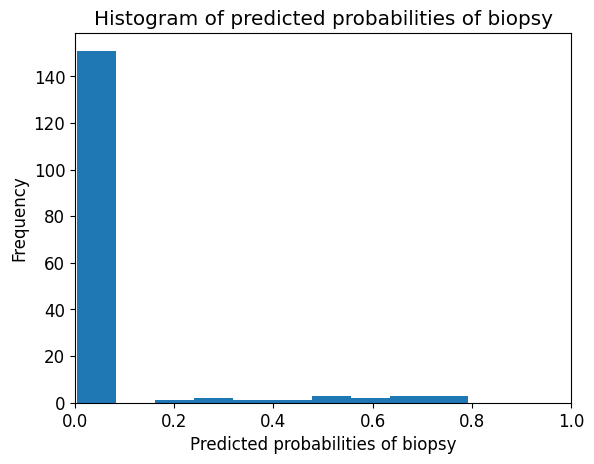

In [ ]:
# plot histogram of predicted probabilities
# adjust the font size
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins=10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of biopsy')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of biopsy')
plt.ylabel('Frequency')

## Observations:
- The histogram is highly positive skewed
- The first column tells us that there are approximately 160 observation with probability between 0.0 and 0.1
- The small number of observation predict the possibility of undergoing biopsy.
- Majority of observation predicts the possibility of not undergoing biopsy.

## Lower the treshold


In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    cm1=0
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    y_pred1= y_pred1.reshape(-1,1)
    y_pred2= binarize(y_pred1, threshold=i/10)
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    cm1 = confusion_matrix(y_test, y_pred2)
    print ('With',i/10, 'threshold the Confusion Matrix is ','\n\n', cm1, '\n\n',
          'with', cm1[0,0]+cm1[1,1], 'correct predictions, ', '\n\n',
          cm1[0,1], 'Type I errors( False Positives), ','\n\n',
          cm1[1,0], 'Type II errors( False Negatives), ','\n\n',
          'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
          'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
          'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])), '\n\n',
          '======================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[149   8]
 [  2   8]] 

 with 157 correct predictions,  

 8 Type I errors( False Positives),  

 2 Type II errors( False Negatives),  

 Accuracy score:  0.9401197604790419 

 Sensitivity:  0.8 

 Specificity:  0.9490445859872612 



With 0.2 threshold the Confusion Matrix is  

 [[149   8]
 [  2   8]] 

 with 157 correct predictions,  

 8 Type I errors( False Positives),  

 2 Type II errors( False Negatives),  

 Accuracy score:  0.9401197604790419 

 Sensitivity:  0.8 

 Specificity:  0.9490445859872612 



With 0.3 threshold the Confusion Matrix is  

 [[150   7]
 [  3   7]] 

 with 157 correct predictions,  

 7 Type I errors( False Positives),  

 3 Type II errors( False Negatives),  

 Accuracy score:  0.9401197604790419 

 Sensitivity:  0.7 

 Specificity:  0.9554140127388535 



With 0.4 threshold the Confusion Matrix is  

 [[150   7]
 [  5   5]] 

 with 155 correct predictions,  

 7 Type I errors( False Positives),  

 5 Typ

## Comments

## ROC - AUC


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

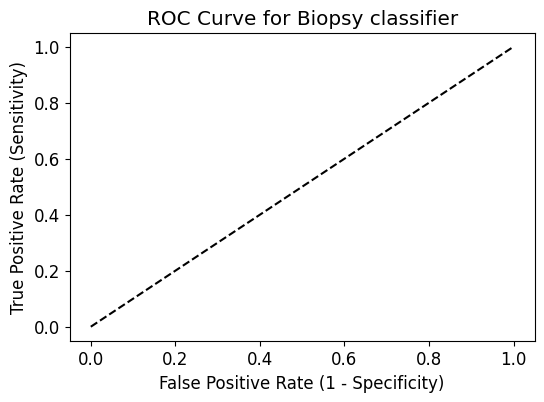

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr,tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size'] =12
plt.title('ROC Curve for Biopsy classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [ ]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9350


In [ ]:
# calculate cross-validated ROC AUC
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9405


## k-Fold Cross Validation

In [ ]:
# Applying 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.96268657 0.96268657 0.94029851 0.96240602 0.94736842]


In [ ]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'. format(scores.mean()))

Average cross-validation score: 0.9551


## Hyperparameter Optimization using GridSearch CV

In [ ]:
# Hyperparameter Optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty': ['11', '12']},
              {'C':[1, 10, 100, 100]}]

grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['11', '12']}, {'C': [1, 10, 100, 100]}],
             scoring='accuracy')

In [ ]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :', '\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :', '\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9581


Parameters that give the best results : 

 {'C': 10}


Estimator that was chosen by the search : 

 LogisticRegression(C=10, random_state=0, solver='liblinear')


In [ ]:
# calculate Gridsearch CV score on test set
print('Gridsearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

Gridsearch CV score on test set: 0.9281


## Results and Conclusion

1. The logistic regression model accuracy score is 0.9461. So, the model does a very good job in predicting whether a patient having the aforementioned illness would undergo biopsy.
2. Small number of observations predict that patients would undergo biopsy. Majority of observations predict that patients would not undergo biopsy.
3. The model shows no signs of overfitting.
4. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether a patient having the aforementioned illness would undergo biopsy.
5. Our original model test accuracy is 0.9461 while GridSearch CV accuracy is 0.9281. We can see that GridSearch CV decreased the performance for this particular model.